In [0]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Classification and decision boundaries
This exercise is about linear classification (actually affine) and the visualization of decision boundaries. Noteably, the parameters of the decision boundary will initially be adjusted manually (or randomly) then learned using least squares.

**Note**
The term linear classification is actually referring to an affine model as it includes a bias term.


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#linear">Task 1: Linear decision boundary</a>
            </li>
            <li>
            <a href="#predict22">Task 2: Prediction function - reflections</a>
            </li>
            <li>
            <a href="#predict">Task 3: Prediction function</a>
            </li>
            <li>
            <a href="#linear_optimization">Task 4: Learning the decision boundary</a>
            </li>
        </ul>
    </div>
</article>

## Linear Decision boundary
The prediction function $f_{w}(\mathbf{x})$ is used to predict which class a data point belongs to, by applying the $\text{sign}$ function to the result of the linear combination of input features and weights. The classification is based on whether the output of $f_{w}(\mathbf{x})$ is positive or negative. 
### Generating data points
In the following section you will be experimenting with a linear classifier: 

$$ f_{w}(\mathbf{x}) =  \mathbf{y} = \text{sign}({w_0} + \mathbf{w}^\top\mathbf{x})$$
where $\mathbf{w}$ are the model parameters (including a bias term) and $\mathbf{x}$ are the coordinates of the input. 
The $\text{sign}$ function is given by:

$$
\text{sign}(z) =
\begin{cases} 
-1 & \text{if } z ≤ 0, \\
1  & \text{if } z > 0.
\end{cases}
$$
Alternatively, using homogeneous representation the classifier is expressed as (with appropriate updates to $\mathbf{w}$ and $\mathbf{x}$):

$$\mathbf{y} = \text{sign}(\mathbf{w}^\top\mathbf{x})$$
### The Decision Boundary
In binary classification the decision boundary separates the positive and negative classes and is defined by:

$$
f_w(\mathbf{x}) = 0
$$
Points on one side (positive) of the boundary will be classified as the positive class (1), while points on the other side (negative) will be classified as the negative class (-1).
For the affine model, the decision boundary is the line when: 

$$
\mathbf{w}^\top \mathbf{x} + w_0 = 0
$$
For a two-dimensional affine model (with features $x_1$ and $x_2$), the decision boundary is given by:

$$
w_1 x_1 + w_2 x_2 + w_0 = 0
$$
For display purposes, the decision boundary can be expressed in terms of $x_1$ and $x_2$ by isolating $x_2$ on one side:

$$
x_2 = -\frac{w_0}{w_2} - \frac{w_1}{w_2} x_1
$$
The cell below imports libraries and generates random data to be used for classification. 


In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.linear_model import LogisticRegression

np.random.seed(42)  ## generate the same sequence of random points
# Generate 2 clusters of data, by drawing from a normal distribution.
S = np.eye(2)  ## covariance matrix, set to indenty matrix i.e. x,y independent. 
p_pos = np.random.multivariate_normal([1, 1], S, 40)
p_neg = np.random.multivariate_normal([-1, -1], S, 40)
## 40 points (x,y) coordinates
p_pos.shape

(40, 2)

The data of the positive and negative classes are stored in the variables `p_pos`
 and `p_neg`
, respectively. The next cell visualizes the two classes. 


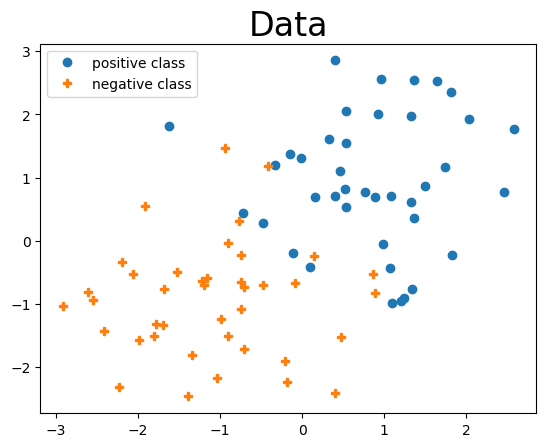

In [2]:
fig, ax = plt.subplots()
ax.plot(p_pos[:, 0], p_pos[:, 1], "o", label='positive class')
ax.plot(p_neg[:, 0], p_neg[:, 1], "P", label='negative class')
plt.title("Data", fontsize=24)
plt.legend()

### Setting the model parameters manually
In the following task you will manually change the model parameters of a linear decision boundary and visualize the results.

---
**Task 1 (easy): Linear decision boundary👩‍💻**
1. Implement the function `linear_boundary`
, which, given an $x_1$-coordinate and the model parameters $w$ = [$w_0$, $w_1$, $w_2$], returns the corresponding $x_2$-value according to:


$$
x_2 = -\frac{w_0}{w_2} - \frac{w_1}{w_2} x_1
$$
2. The array `x_values`
 below provides the $x_1$-values (x-coordinates) over which the boundary will be plotted. The model parameters $w_0$, $w_1$, and $w_2$ define the position and slope of the boundary. Use the `linear_boundary`
 function to generate points for the decision boundary by implementing the following steps:

- Create an array `w`
 with the manually selected model parameters. 
- Pass the `x_values`
 and `w`
 to the `linear_boundary`
 function to calculate the corresponding $x_2$-values.

3. Run the cell below to visualize the decision boundary. Which choice of model parameters $w_0$, $w_1$, and $w_2$ seems to visually best separate the two classes? Try 10 different sets of model parameters and identify which values provide the largest fraction of correct predictions.


---

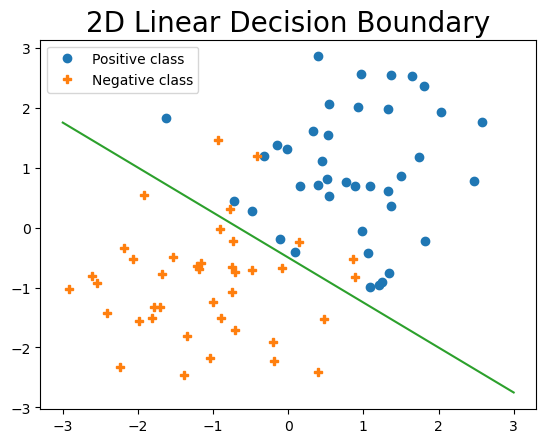

In [54]:
def linear_boundary(x, w):
    """
    :param x: x values of the line.
    :param w: List of model parameters [bias, slope] of the line.
    
    :return: the x2 values which correspond to the y-values of the boundary / line .
    """
    return -(w[0]/w[2]) - (w[1]/w[2]) * x
    
    ...

# Defining x-values and weights
x_values = np.linspace(-3, 3, 100)
w = [-1, -1.5, -2] # write your solution here

# Plotting the data points and decision boundary
fig, ax = plt.subplots()
ax.plot(p_pos[:, 0], p_pos[:, 1], "o", label='Positive class')
ax.plot(p_neg[:, 0], p_neg[:, 1], "P", label='Negative class')
ax.plot(x_values, linear_boundary(x_values, w))
plt.title("2D Linear Decision Boundary", fontsize=20)
plt.legend()
plt.show()


---
**Task 2 (easy): Prediction function - reflections💡**
1. Is a linear decision boundary a good model to separate the two groups of data? 
2. A correct prediction occurs when  $y_i \cdot f_w(\mathbf{x}_i)$  is positive, where  $y_i$  is the true label for the $i$-th data point and  $\mathbf{x}_i$  is the input vector for the $i$-th data point. Why is this the case?


---

In [20]:
# Write your reflections here

""" 
1.	Yes, a linear decision boundary can be effective here because the two clusters 
    seem linearly separable given that they were generated from normal distributions 
    centered around different means.

2.	The expression  y_i * f_w(x_i) > 0  indicates a correct prediction because:
	• If  y_i = 1  (positive class), we want  f_w(x_i) > 0, so  y_i * f_w(x_i) > 0.
	• If  y_i = -1 (negative class), we want  f_w(x_i) < 0, ensuring  y_i * f_w(x_i) > 0.
	• This condition confirms the predicted sign of f_w(x_i) matches the true label’s sign.

"""



' \n1.\tYes, a linear decision boundary can be effective here because the two clusters \n    seem linearly separable given that they were generated from normal distributions \n    centered around different means.\n\n2.\tThe expression  y_i * f_w(x_i) > 0  indicates a correct prediction because:\n\t• If  y_i = 1  (positive class), we want  f_w(x_i) > 0, so  y_i * f_w(x_i) > 0.\n\t• If  y_i = -1 (negative class), we want  f_w(x_i) < 0, ensuring  y_i * f_w(x_i) > 0.\n\t• This condition confirms the predicted sign of f_w(x_i) matches the true label’s sign.\n\n'

### Making and evaluating predictions
The performance of the model can be evaluated by calculating the _accuracy_, which is defined as (percentage): 
$$ \text{accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$
.

---
**Task 3 (easy): Prediction function👩‍💻**
1. Implement the function `predict`
 that given the data and the model parameters `w`
 as input, predicts whether a data point belongs to the `neg`
 or `pos`
 class. Return 1 for points above the boundary (positive class) and -1 for points below the boundary (negative class). Manually select the model parameters to predict class labels for both the `p_neg`
 and `p_pos`
 variables by calculating the sign of the prediction function  $f_w(\mathbf{x})=z = w_0 + w_1 \cdot x_1 + w_2 \cdot x_2$  for each data point. 

2. Implement and execute the `accuracy`
 function that returns the accuracy of the classifier over the entire training set by comparing the predicted classes to the actual classes.



**Tip**
The denominator in the accuracy formula can be found by counting the number of times the prediction $f_w(\mathbf{x_i}) = y_i$, or the amount of times $ y_i \cdot f_w(\mathbf{x_i}) > 0 $,  where  $y_i$ are the labels.


---

In [72]:
def predict(w, x):
    """
    Predict class based on decision boundary (logistic regression).
    :param w: Model parameters [w0, w1, w2].
    :param p: Data points to classify (Nx2 array).
    
    :return: Predicted class labels (-1 for neg, 1 for pos).
    """
    # Calculate the linear combination and apply sign function for class prediction
    x1 = x[0]
    x2 = x[1]

    # The linear_boundary function returns the decision boundary value x2
    boundary_y = linear_boundary(x1, w) # computes the expected y -value on the boundary at the x_1 -coordinate of  x.
    
    return 1 if x2 > boundary_y else -1 # x2 is the y value of the data point. boundary_y is the y value of the decision boundary.

def accuracy(predictions, targets):
    """
    :param predictions (1xn array): of predicted classes for the n data points.
    :param targets (1xn array):  actual classes for the n data points.
     
    :return (float): fraction of correctly predicted points (num_correct/num_points).
    """
    # Count correct predictions by comparing with true labels
    correct_predictions = np.sum(predictions == targets)
    return correct_predictions / len(targets)           # Calculate fraction


# Generate predictions for each class
pred_pos = np.array([predict(w, x) for x in p_pos])     # Positive points
pred_neg = np.array([predict(w, x) for x in p_neg])     # Negative points


# Define true labels for positive and negative classes
labels_pos = np.ones(p_pos.shape[0])                    # Just 1's  for pos
labels_neg = -np.ones(p_neg.shape[0])                   # Just -1's for neg

# Calculate accuracy for each class
acc_pos = accuracy(pred_pos, labels_pos)
acc_neg = accuracy(pred_neg, labels_neg)

print(f'Accuracy of decision line: {(acc_neg + acc_pos) / 2 :.3f}')

Accuracy of decision line: 0.925



---
**Task 4 (easy): Learning the decision boundary👩‍💻**
1. Implement the `learn_affine_classifier`
 function which given arrays of positive and negative examples uses least squares to estimate the model parameters `w`
 to separate the two classes. In particular the function should:
    - Construct the $N \times 3$ design matrix containing the data points.
    - Construct the vector `labels`
 consisting of the labels  (1 for positive class, -1 for negative class).
    - Solve the linear set of equations.


2. Run the cell below to plot the decision boundary. 

3. Evaluate the accuracy of the learned decision boundary: 
    - Use the `predict`
 function to predict class labels for the data points. 
    - Use the `accuracy`
 function to evaluate the found model.
    - Compare the decision boundary and the accuracy measures to the one obtained in [Task 3](#predict). How do the values found manually compare to the one found automatically through least squares?




---

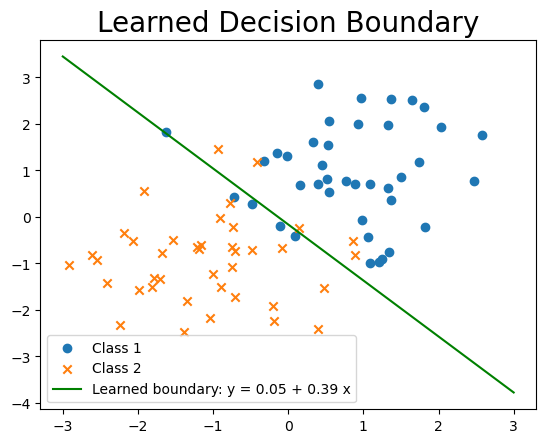

Accuracy of learned boundary: 0.887


In [73]:
# 1
def learn_affine_classifier(p_pos, p_neg):
    """
    Fit the decision boundary using least squares regression.
    
    :param p_pos: Data points of the positive class.
    :param p_neg: Data points of the negative class.
    
    :return: The learned parameters w (intercept and slope).
    """
    # Combine the positive and negative points into a single dataset
    data = np.vstack((p_pos, p_neg))  # Stack pos and neg examples vertically
    # Create the labels: 1 for positive class, 0 for negative class
    labels = np.concatenate((np.ones(p_pos.shape[0]), -np.ones(p_neg.shape[0])))
    # Add a bias column (column of 1s) to the data
    X = np.hstack((np.ones((data.shape[0], 1)), data))  # Add bias term
    # Learn the model parameters
    w_least_squares, _, _, _ = np.linalg.lstsq(X, labels, rcond = None)  # Least squares solution for w
    # Return the model parameters
    return w_least_squares

# Find the decision boundary with least squares
w_learned = learn_affine_classifier(p_pos, p_neg)

# 2
# Define x-values for plotting the decision boundaries
x_values = np.linspace(-3, 3, 100)

# Plotting the learned decision boundary
fig, ax = plt.subplots()
ax.scatter(p_pos[:, 0], p_pos[:, 1], marker='o', label='Class 1')  # positive class
ax.scatter(p_neg[:, 0], p_neg[:, 1], marker='x', label='Class 2')  # negative class
ax.plot(x_values, linear_boundary(x_values, w_learned), label='Learned boundary: y = %.2f + %.2f x' % (w_learned[0], w_learned[1]), color='green')
plt.title("Learned Decision Boundary", fontsize=20)
plt.legend()
plt.show()

# 3
# Get predictions for positive and negative class data
pred_pos = np.array([predict(w_learned, x) for x in p_pos])
pred_neg = np.array([predict(w_learned, x) for x in p_neg])

# Define true labels for positive and negative classes
labels_pos = np.ones(p_pos.shape[0])
labels_neg = -np.ones(p_neg.shape[0])

# Calculate accuracy for each class
acc_pos = accuracy(pred_pos, labels_pos)
acc_neg = accuracy(pred_neg, labels_neg)

print(f'Accuracy of learned boundary: {(acc_neg + acc_pos) / 2:.3f}')